## Metadata analyses by clusters - sediment


Comments: There were many great suggestions on what to look at in the 3 clusters; for example: 
<li>A. molecular properties such as diversity indices, classes (i.e. lignin, aliphatic compounds), NOSC, H/C and O/C ratios, DBE, AI_Mod….. 
<li>B. a focus on environmental processes: NPOC/Fe representing more "terrestrial" inputs VS 18O/2H that might represent more groundsed inputs
<br>We should also try and create a plot for ’NPOC vs Fe’ and ‘18O vs 2H’. 
<br>The more molecular stuff maybe as well in a similar way ? ‘H/C vs O/C’  ? 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

sns.set_theme()

In [2]:
# Metadata
metadata = pd.read_csv('../Dataset/FTICR_meta_all_2021-09-29.csv').set_index('ID')
print('Metadata: ' + str(metadata.shape))
label1 = pd.read_csv('water_cluster_label.csv')
print('sed: ' + str(label1.shape))
label2 = pd.read_csv('sediment_cluster_label.csv')
print('Sediment: ' + str(label2.shape))
label = pd.concat([label1,label2], axis=0)

label = label.set_index('sample_id')

df = metadata.join(label,how='left')

df.head()

Metadata: (504, 69)
sed: (265, 2)
Sediment: (239, 2)


,river.id,sample.type,location.id,sampling.type,replicate.id,original.id,Date,Start_Time,Time_zone,Stream_Name,Stream_Order,City,State_or_Province,Country,General_Vegetation,Weather,Hydrogeomorphology,River_Gradient,Intermittent_or_Perennial,Sediment,Distance_DS.and.MS_meters,Distance_MS.and.US_meters,Primary.Sources.Flow.Variation,pH,Temp_degC,DO_perc.sat,DO_mg.per.L,Algal.Mat.Coverage,Depositional.Type,Latitude_dec.deg,Longitude_dec.deg,Macrophyte.Coverage,Sunlight.Access_Perc.Canopy.Cover,Water.Column.Height_cm,Sampler_Organization,Associated_Site,Sampler_Name,Approx.Distance.From.Gauge_meters,Discharge_Link,US.or.DS.of.Gauge,Gauge_Latitude_dec.deg,Gauge_Longitude_dec.deg,Met.Station.Nearby,Met.Station,Precipitation.Within.Week,Number.Days.Since.Precip,Dam.Upstream.Site,Dam,Contamination.Source.Upstream,Contamination.Source,Water.Quality.Data.Available,Water.Quality.Data,Known.Data,Published.Work.On.Site,Published.Work,Notes,Study_Code,resprate_mg.L.h,resp.inc.time.min,resp.r2,resp.pval,NPOC_mg.L.asC,del2H_permil,del18O_permil,Cl_mgL,SO4_mgL,NO3_mgL,NO2_mgL,F_mgL,cluster
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SED_S19S.0001_D_Field,S19S.0001,SED,D,Field,NaN,S19S_0001_Sed_Field_ICR.D_p2,19-Sep-19,12:00,PST,Fraser,9.0,Hope,British Columbia,Canada,Grass,Partly cloudy,Single-channel meandering,Relatively flat/gentle gradient (e.g. valleys),Perennial,Sand,15.0,15.0,Natural flow (seasonal). Glacial melt,NaN,NaN,NaN,NaN,No,Shallow waters near the shore,49.38609,-121.45047,No,Full sunlight (0-20% canopy cover),17,Thompson Rivers University,NaN,Eric Bottos,100,https://wateroffice.ec.gc.ca/report/real_time_...,Downstream,49.38583,-121.45416,Yes,Hope A: https://climate.weather.gc.ca/climate_...,Yes,1,No,NaN,Yes,Town of Hope. population of ~6100. 0m from sam...,Yes,Turbidity. Specific Conductivity. Temperature....,Specific Conductivity: 116.58 uS/cm http://aqu...,NaN,https://www.jstor.org/stable/4251587?seq=1#met...,NaN,WHONDRS_S19S,NaN,NaN,NaN,NaN,2.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sed_2
SED_S19S.0001_M_Field,S19S.0001,SED,M,Field,NaN,S19S_0001_Sed_Field_ICR.M_p2,19-Sep-19,12:00,PST,Fraser,9.0,Hope,British Columbia,Canada,Grass,Partly cloudy,Single-channel meandering,Relatively flat/gentle gradient (e.g. valleys),Perennial,Sand,15.0,15.0,Natural flow (seasonal). Glacial melt,NaN,NaN,NaN,NaN,No,Shallow waters near the shore,49.38626,-121.45055,No,Full sunlight (0-20% canopy cover),16,Thompson Rivers University,NaN,Eric Bottos,100,https://wateroffice.ec.gc.ca/report/real_time_...,Downstream,49.38583,-121.45416,Yes,Hope A: https://climate.weather.gc.ca/climate_...,Yes,1,No,NaN,Yes,Town of Hope. population of ~6100. 0m from sam...,Yes,Turbidity. Specific Conductivity. Temperature....,Specific Conductivity: 116.58 uS/cm http://aqu...,NaN,https://www.jstor.org/stable/4251587?seq=1#met...,NaN,WHONDRS_S19S,NaN,NaN,NaN,NaN,2.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sed_2
SED_S19S.0001_U_Field,S19S.0001,SED,U,Field,NaN,S19S_0001_Sed_Field_ICR.U_p2,19-Sep-19,12:00,PST,Fraser,9.0,Hope,British Columbia,Canada,Grass,Partly cloudy,Single-channel meandering,Relatively flat/gentle gradient (e.g. valleys),Perennial,Sand,15.0,15.0,Natural flow (seasonal). Glacial melt,NaN,NaN,NaN,NaN,No,Shallow waters near the shore,49.38639,-121.45063,Low,Full sunlight (0-20% canopy cover),19,Thompson Rivers University,NaN,Eric Bottos,100,https://wateroffice.ec.gc.ca/report/real_time_...,Downstream,49.38583,-121.45416,Yes,Hope A: https://climate.weather.gc.ca/climate_...,Yes,1,No,NaN,Yes,Town of Hope. population of ~6100. 0m from sam...,Yes,Turbidity. Specific Conductivity. Temperature....,Specific Conductivity: 116.58 uS/cm http://aqu...,NaN,https://www.jstor.org/stable/4251587?seq=1#met...,NaN,WHONDRS_S19S,NaN,NaN,NaN,NaN,3.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sed_2
SED_S19S.0003_D_Field,S19S.0003,SED,D,Field,NaN,S19S_0003_Sed_Field_ICR.D_p15,8-Sep-19,15:15,PST,Thompson,7.0,Kamloops,British Columbia,Canada,Not vegetated,Partly cloudy,Single-channel str

In [3]:
df['cluster'].value_counts()

sw_0     147
sed_2    146
sw_2      90
sed_0     76
sw_1      28
sed_1     17
Name: cluster, dtype: int64

In [4]:
# # Molecular parameters
# mparams1 = pd.read_csv('../Dataset/sed_Prevalence_10_crosstable_2021-09-29.csv')
# mparams2 = pd.read_csv('../Dataset/Sediment_Prevalence_10_crosstable_2021-09-29.csv')

## sed

In [5]:
dfs = df[df['sample.type']=='SED']

#### Check missing value per column

In [6]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", dfs.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 river.id                               0
sample.type                            0
location.id                            0
sampling.type                          0
replicate.id                         239
original.id                            0
Date                                   0
Start_Time                             0
Time_zone                              3
Stream_Name                            0
Stream_Order                          28
City                                   0
State_or_Province                     13
Country                                0
General_Vegetation                     0
Weather                                9
Hydrogeomorphology                     0
River_Gradient                         0
Intermittent_or_Perennial              6
Sediment                               0
Distance_DS.and.MS_meters              0
Distance_MS.and.US_meters              0
Primary.Sources.Flow.Variation        19
pH  

In [7]:
dfs.shape

(239, 70)

In [8]:
colmiss = ['Stream_Order', #cat
           'Precipitation.Within.Week', #cat
           'Number.Days.Since.Precip', #cat
           'resprate_mg.L.h'] #num

sed = dfs.copy()

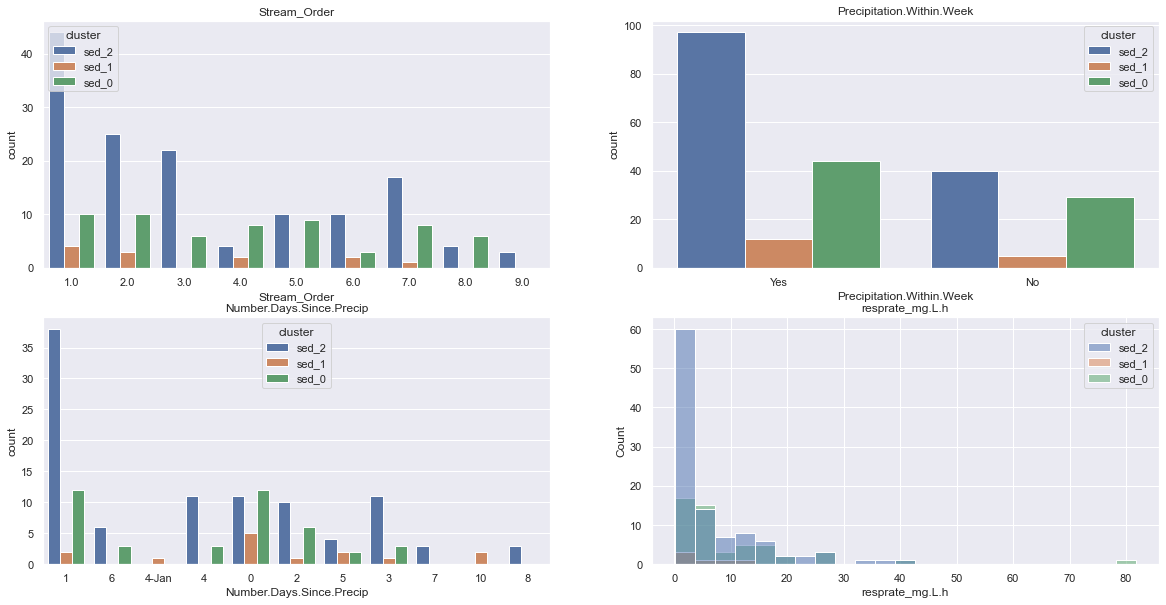

In [9]:
sns.set(rc={'figure.figsize':(20,10)})
f,axs = plt.subplots(2,2)
axs = axs.ravel()

cnt = 0
for i in colmiss:
    if cnt < 3:
        sns.countplot(data=sed, x=i, ax=axs[cnt], hue='cluster').set_title(i)
    if cnt >= 3:
        sns.histplot(data=sed, x=i, ax=axs[cnt], hue='cluster').set_title(i)
    cnt = cnt + 1

In [10]:
sed.groupby('cluster')[colmiss[-2:]].describe()

resprate_mg.L.h                                                     \
                  count      mean        std   min     25%    50%      75%   
cluster                                                                      
sed_0              52.0  9.917115  13.196968  0.44  2.5375  5.255  11.9300   
sed_1               6.0  5.000000   4.210178  0.39  1.3550  5.165   7.4825   
sed_2             105.0  6.436190   8.542155  0.10  1.0000  2.370   8.7600   

                
           max  
cluster         
sed_0    81.75  
sed_1    10.94  
sed_2    41.85

In [11]:
sed.dtypes

river.id                              object
sample.type                           object
location.id                           object
sampling.type                         object
replicate.id                         float64
original.id                           object
Date                                  object
Start_Time                            object
Time_zone                             object
Stream_Name                           object
Stream_Order                         float64
City                                  object
State_or_Province                     object
Country                               object
General_Vegetation                    object
Weather                               object
Hydrogeomorphology                    object
River_Gradient                        object
Intermittent_or_Perennial             object
Sediment                              object
Distance_DS.and.MS_meters            float64
Distance_MS.and.US_meters            float64
Primary.So

In [12]:
target = ['cluster']

In [13]:
# 16
colnum = ['Distance_DS.and.MS_meters',
          'Distance_MS.and.US_meters',
          'Approx.Distance.From.Gauge_meters',
          'Number.Days.Since.Precip',
          'resprate_mg.L.h',
          'NPOC_mg.L.asC']

# Data cleaning

sed.loc[(sed['Approx.Distance.From.Gauge_meters'] == '<100'), 'Approx.Distance.From.Gauge_meters']= 99.0
sed.loc[(sed['Number.Days.Since.Precip'] == '4-Jan'), 'Number.Days.Since.Precip']= 4

sed[colnum] = sed[colnum].astype(float)

In [14]:
# 12
colcat = ['Country',
          'General_Vegetation',
          'Weather',
          'Hydrogeomorphology',
          'Intermittent_or_Perennial',
          'Sediment',
          'US.or.DS.of.Gauge',
          'Precipitation.Within.Week',
          'Dam.Upstream.Site',
          'Stream_Order',
          'River_Gradient',
          'Primary.Sources.Flow.Variation']

sed[colcat] = sed[colcat].astype(str)

#### Categorical column

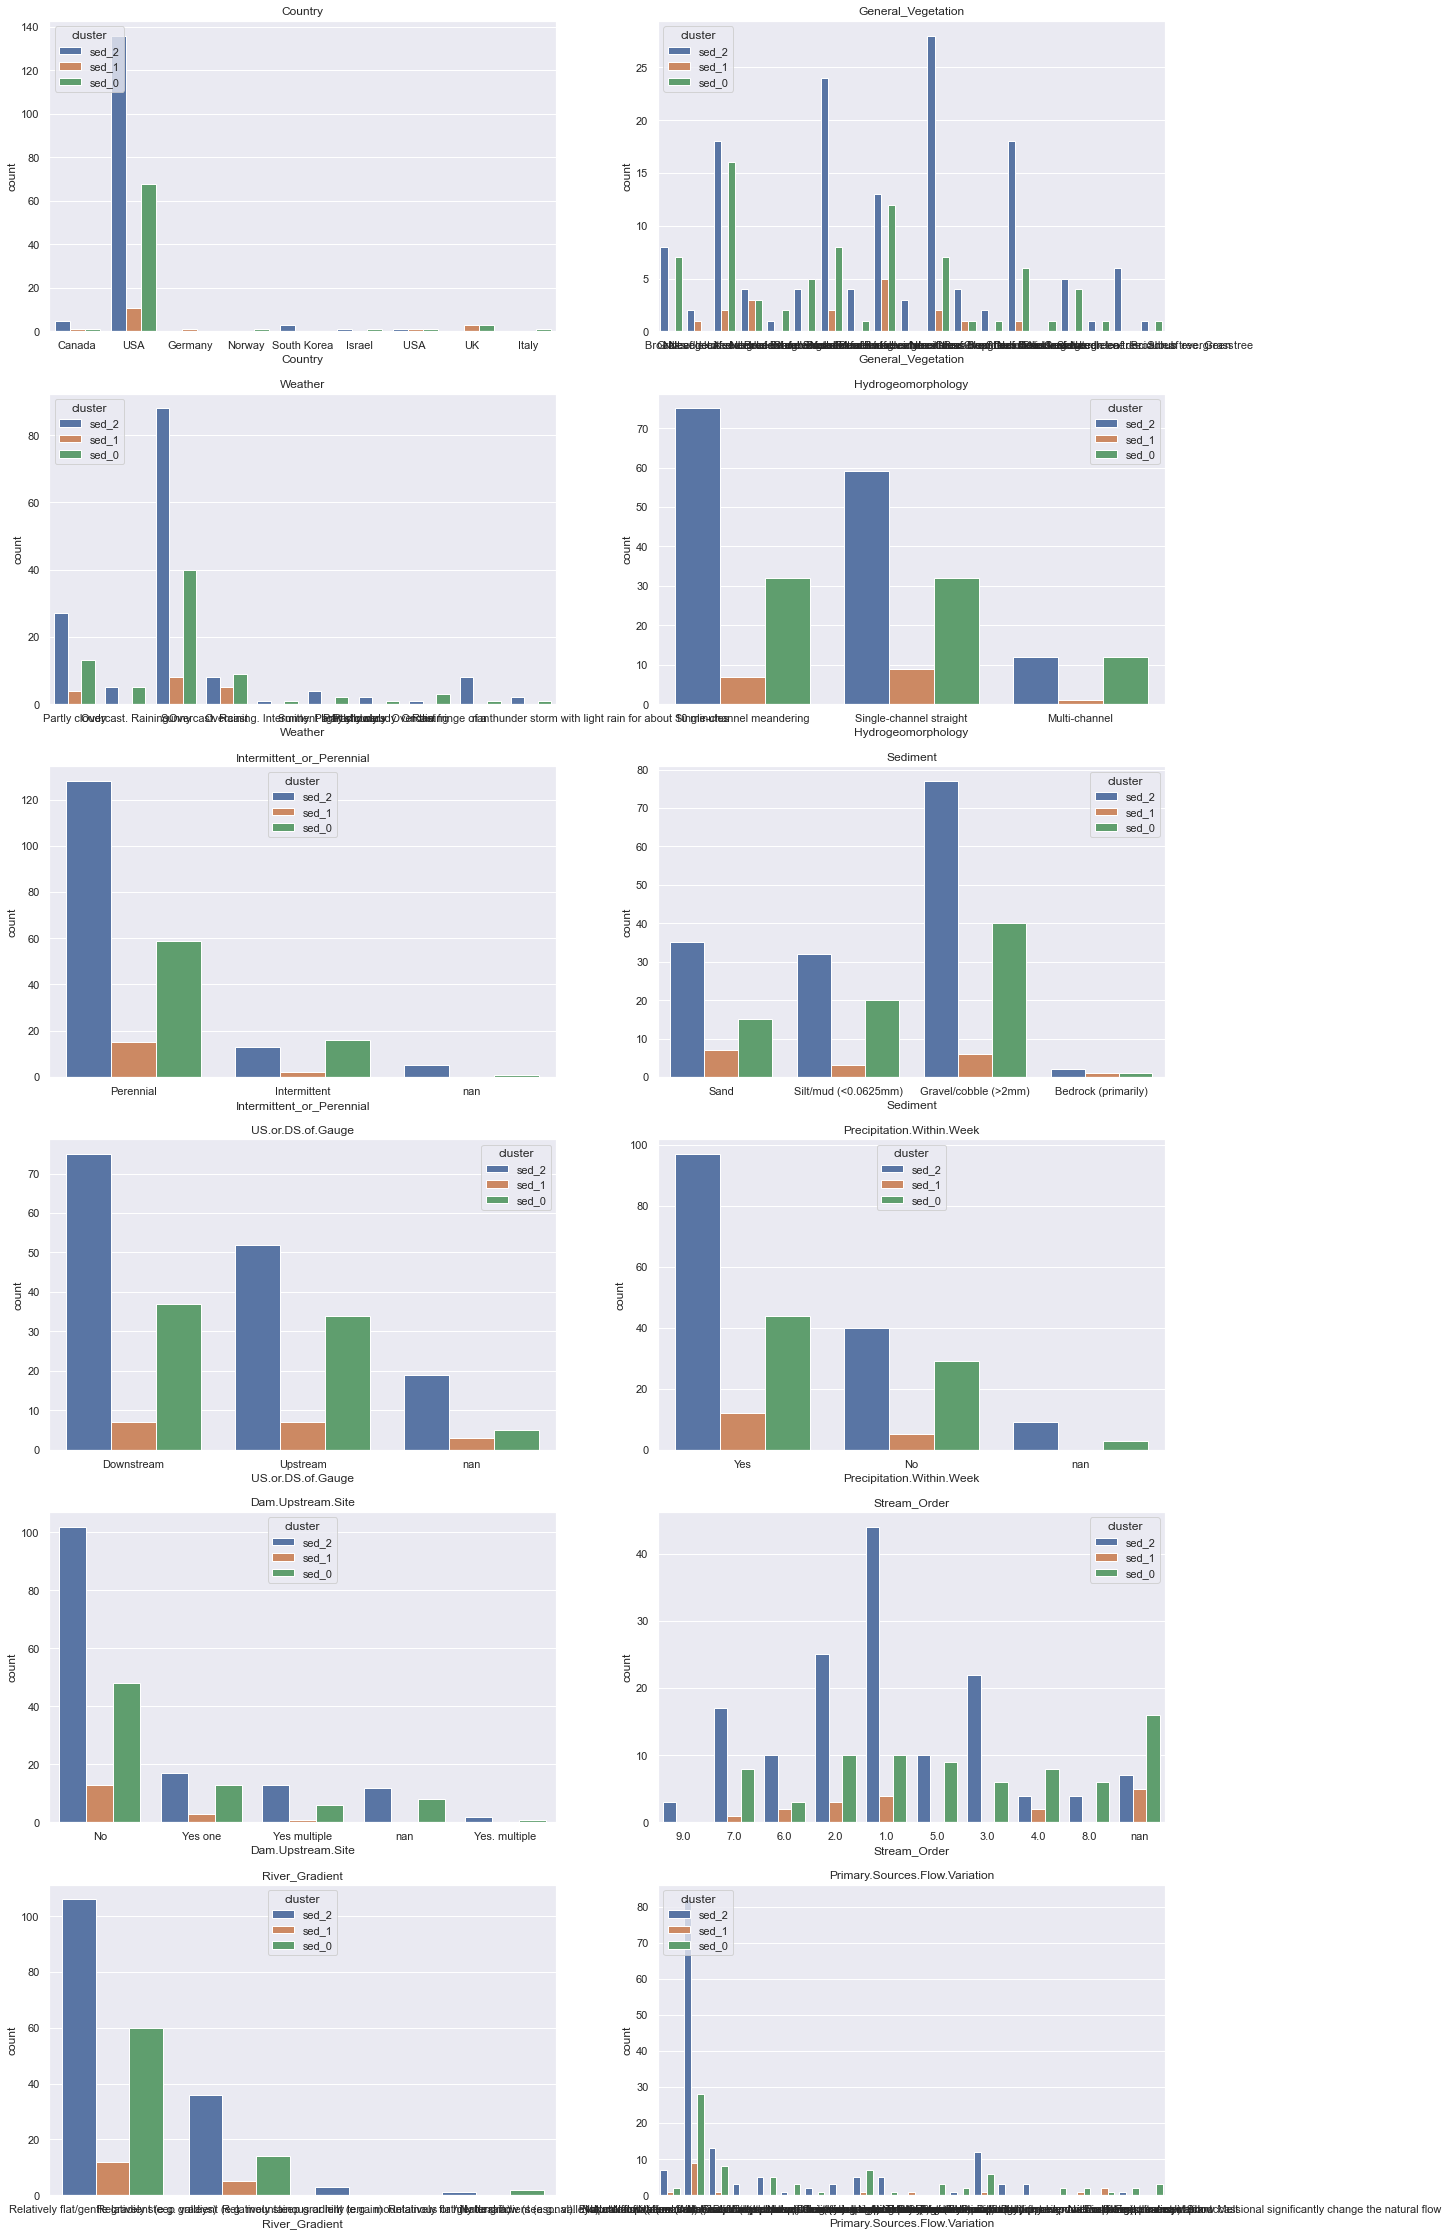

In [15]:
sns.set(rc={'figure.figsize':(20,40)})
f,axs = plt.subplots(6,2)
axs = axs.ravel()

cnt = 0
for i in colcat:
    sns.countplot(data=sed, x=i, ax=axs[cnt], hue='cluster').set_title(i)
    cnt = cnt + 1

#### Numerical column

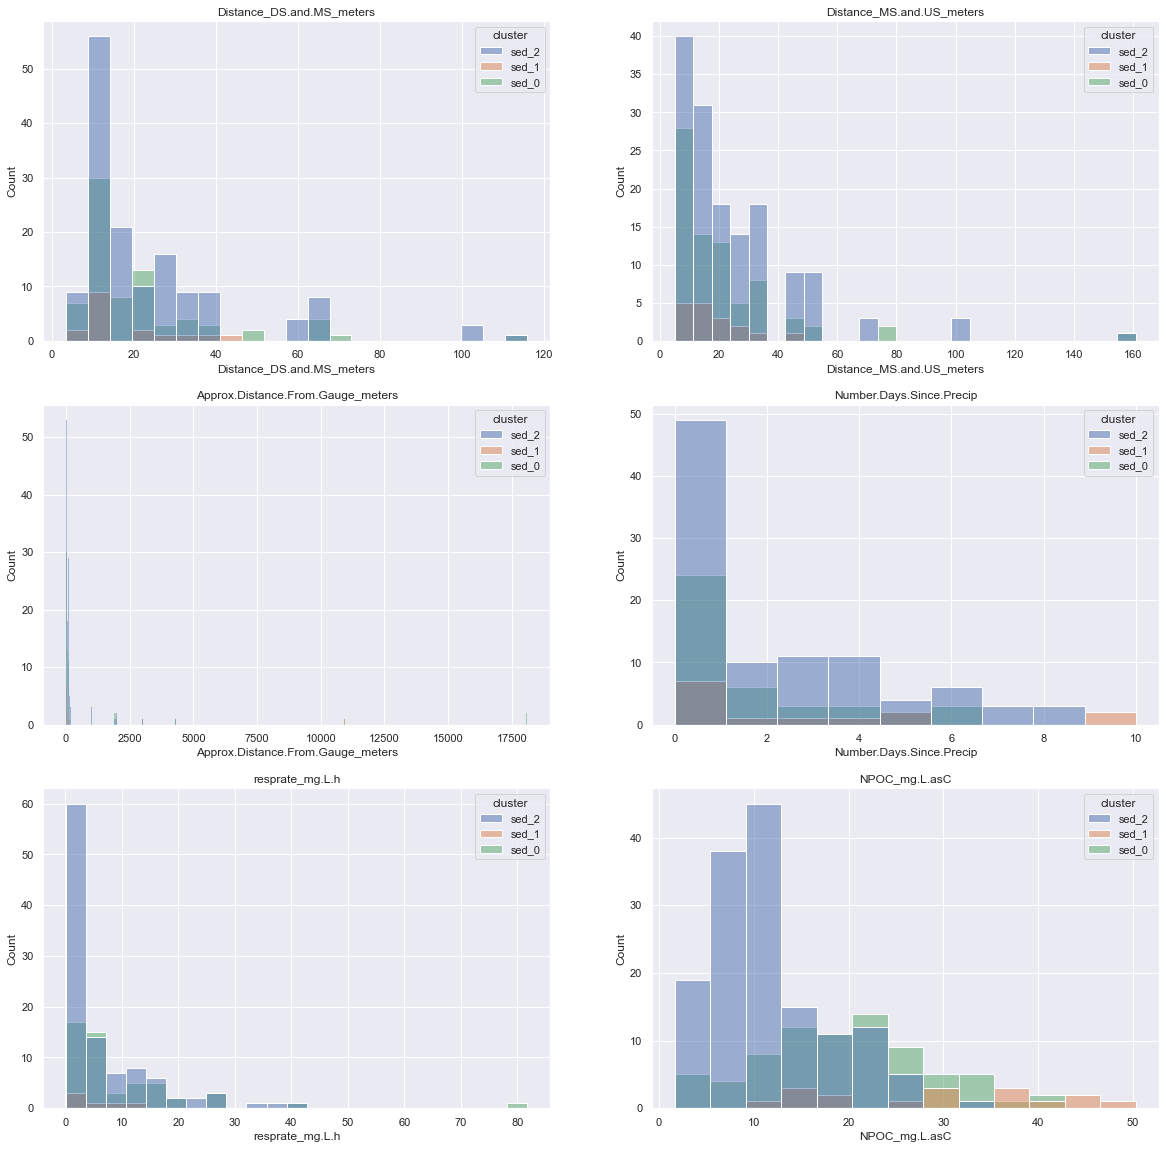

In [16]:
sns.set(rc={'figure.figsize':(20,20)})
f,axs = plt.subplots(3,2)
axs = axs.ravel()

cnt = 0
for i in colnum:
    sns.histplot(data=sed, x=i, ax=axs[cnt], hue='cluster').set_title(i)
    cnt = cnt + 1

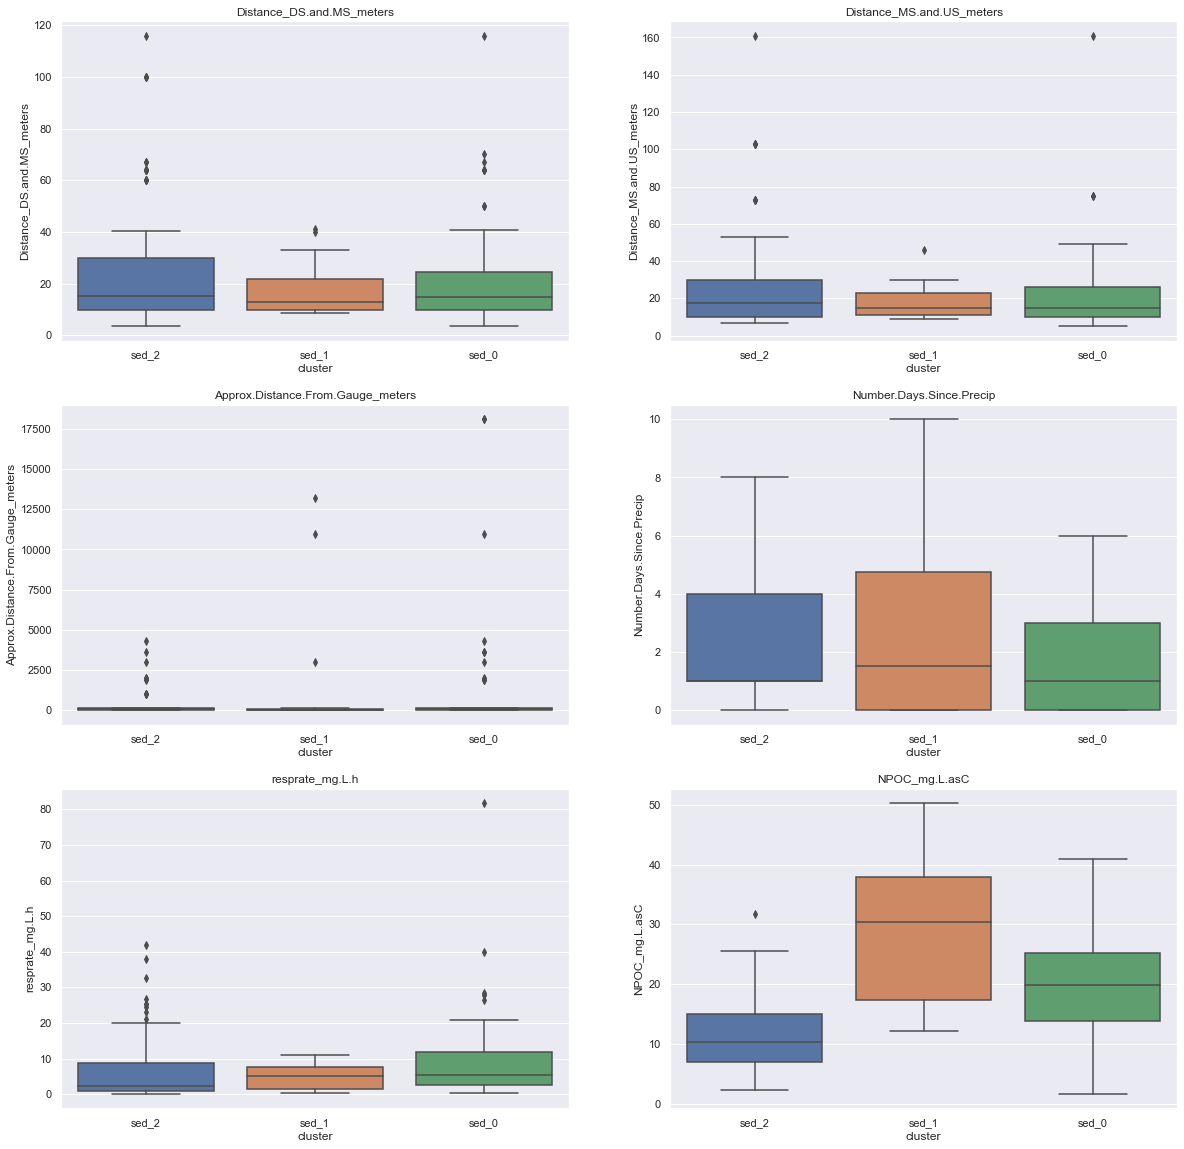

In [17]:
sns.set(rc={'figure.figsize':(20,20)})
f,axs = plt.subplots(3,2)
axs = axs.ravel()

cnt = 0
for i in colnum:
    sns.boxplot(x='cluster', y=i, data=sed, orient='v', ax=axs[cnt]).set_title(i)
    cnt = cnt + 1

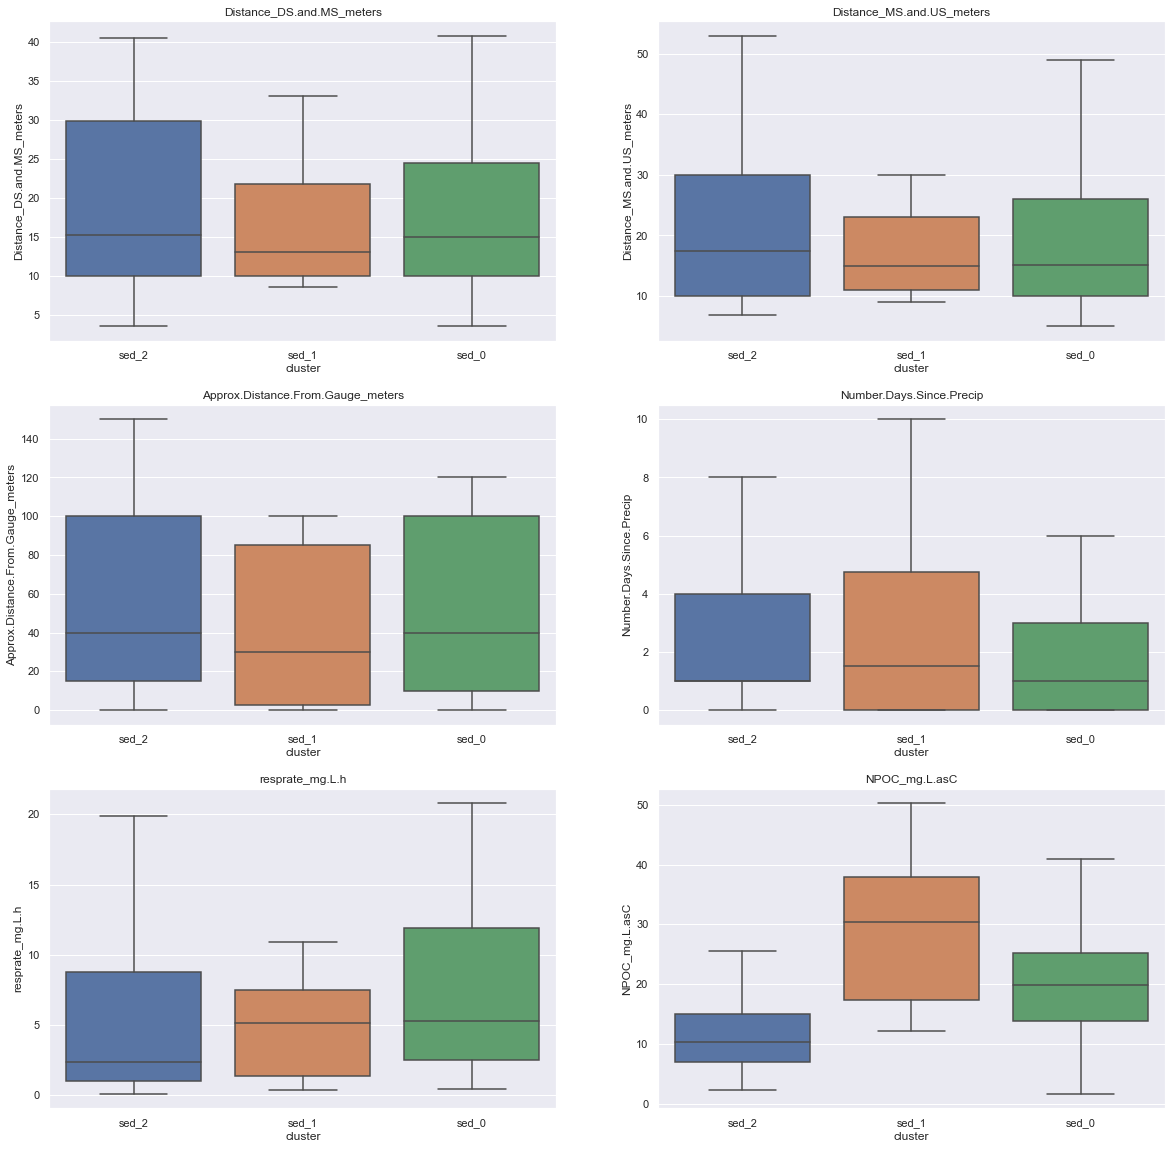

In [18]:
sns.set(rc={'figure.figsize':(20,20)})
f,axs = plt.subplots(3,2)
axs = axs.ravel()

cnt = 0
for i in colnum:
    sns.boxplot(x='cluster', y=i, data=sed, orient='v', ax=axs[cnt], showfliers = False).set_title(i)
    cnt = cnt + 1

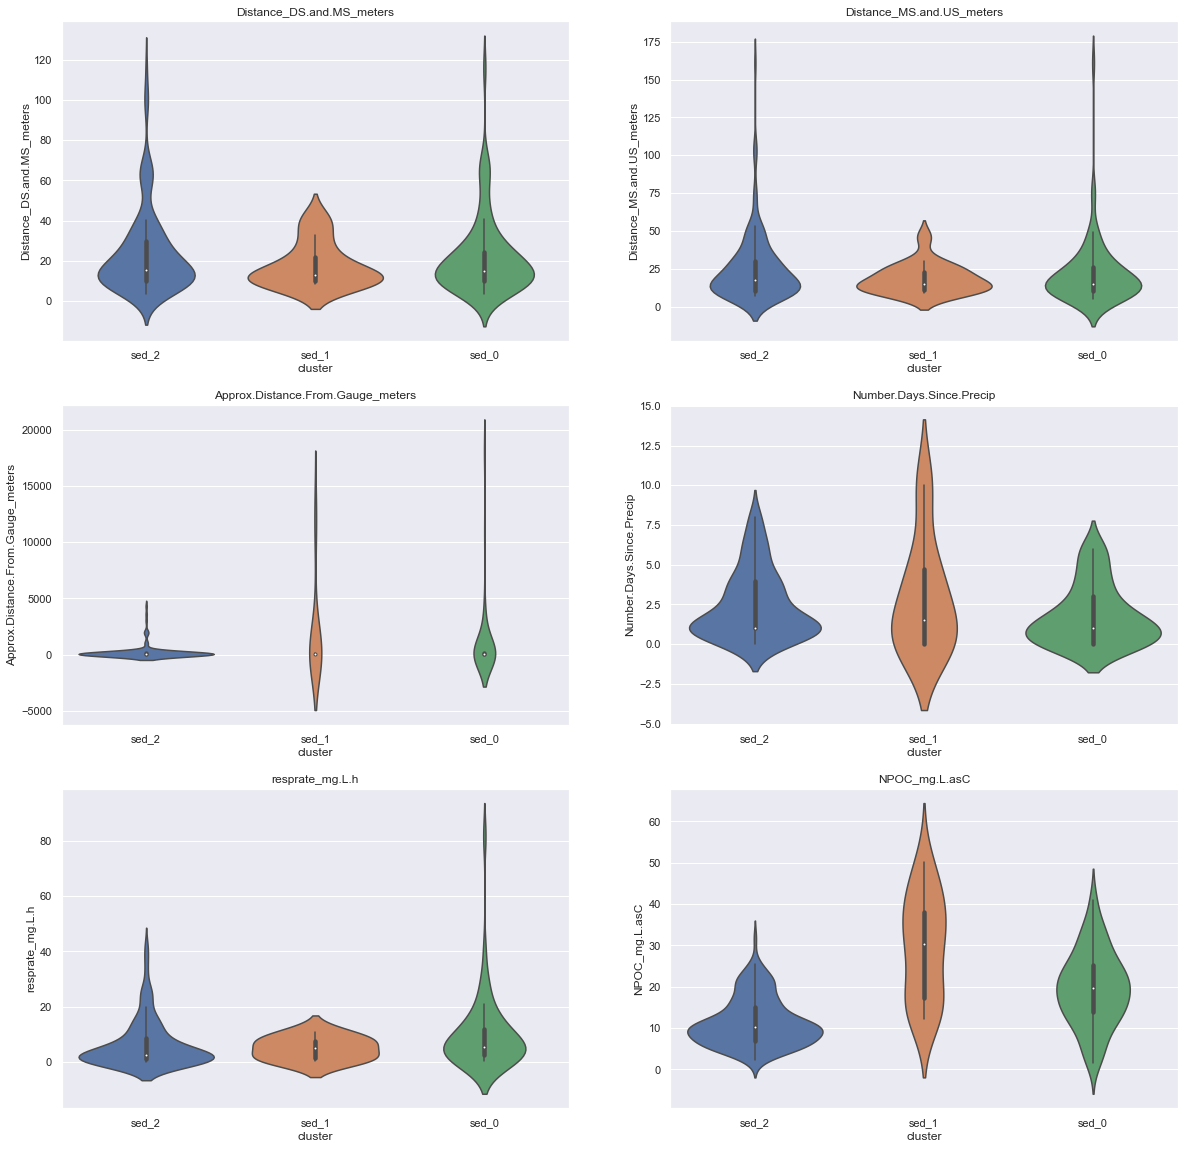

In [19]:
sns.set(rc={'figure.figsize':(20,20)})
f,axs = plt.subplots(3,2)
axs = axs.ravel()

cnt = 0
for i in colnum:
    sns.violinplot(x='cluster', y=i, data=sed, orient='v', ax=axs[cnt]).set_title(i)
    cnt = cnt + 1

## Scatterplot


In [20]:
colnum

['Distance_DS.and.MS_meters',
 'Distance_MS.and.US_meters',
 'Approx.Distance.From.Gauge_meters',
 'Number.Days.Since.Precip',
 'resprate_mg.L.h',
 'NPOC_mg.L.asC']

<AxesSubplot:xlabel='NPOC_mg.L.asC', ylabel='resprate_mg.L.h'>

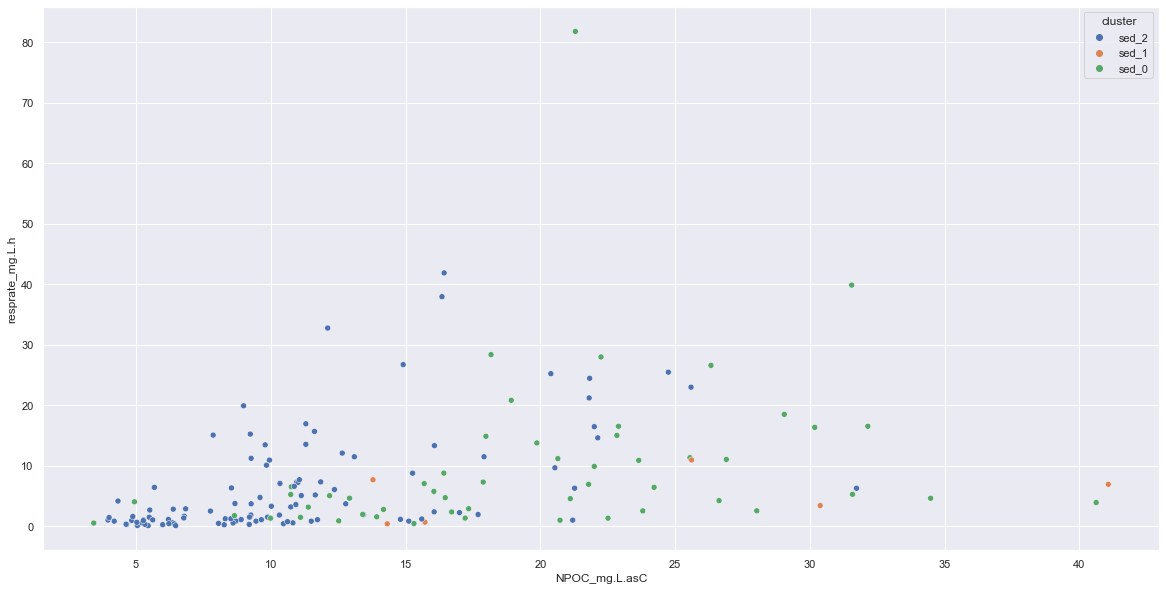

In [21]:
## NPOC vs resprate_mg.L.h
sns.set(rc={'figure.figsize':(20,10)})
sns.scatterplot(data=sed, x='NPOC_mg.L.asC', y='resprate_mg.L.h', legend='full', hue='cluster')